<a href="https://colab.research.google.com/github/joyboy129/federated/blob/main/Federated_learning_entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@test {"skip": true}

!pip install --quiet --upgrade tensorflow-federated
import nest_asyncio
nest_asyncio.apply()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.2/365.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%load_ext tensorboard

In [ ]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("BigData.csv", sep=',', encoding='latin-1')


In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.rename(columns={"ElectronÃ©gativitÃ©": "Electronégativité"}, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.dtypes
df=df.iloc[:10000]

In [ ]:
client1 = 25
client2 = 25
client3 = 25
client4 = 25

In [ ]:
import random
client1 = int((client1/100) *df.shape[0])
client2 = int((client2/100) *df.shape[0])
client3 = int((client3/100) *df.shape[0])
client4 = df.shape[0] - client1 - client2 - client3
my_list = [1] * client1 + [2] * client2 + [3] * client3 + [4] * client4
random.shuffle(my_list)

In [ ]:
df['id'] = my_list


In [ ]:
df.head()

In [ ]:
import nest_asyncio
nest_asyncio.apply()
%load_ext tensorboard

In [ ]:
import collections
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
np.random.seed(0)
tff.federated_computation(lambda: 'Hello, World!')()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Etat d'entropie"] = encoder.fit_transform(df["Etat d'entropie"])
df.head()

In [ ]:
df.dtypes

In [ ]:
client_id_colname = 'id' # the column that represents client ID
SHUFFLE_BUFFER = 1000
NUM_EPOCHS = 5

In [ ]:
# split client id into train and test clients
train_frac = 0.8
client_ids = df[client_id_colname].unique()
train_client_ids = [1,2,3]
test_client_ids = [4]
print(client_ids)

In [ ]:
train_client_ids

In [ ]:
def create_tf_dataset_for_client_fn(client_id):
  # a function which takes a client_id and returns a
  # tf.data.Dataset for that client
    client_data = df[df[client_id_colname] == client_id]
    client_data = client_data.drop(columns=["id"])
    dataset = tf.data.Dataset.from_tensor_slices(client_data.to_dict('list'))
    dataset = dataset.shuffle(SHUFFLE_BUFFER).batch(1).repeat(NUM_EPOCHS)
    return dataset

In [ ]:
train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=train_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )
test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=test_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

In [ ]:
train_data.element_type_structure

In [ ]:
example_dataset = train_data.create_tf_dataset_for_client(
    train_data.client_ids[0])

example_element = next(iter(example_dataset))


In [ ]:
NUM_CLIENTS = 4
NUM_EPOCHS = 5
BATCH_SIZE = 32
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

        def batch_format_fn(element):
            output = tf.concat([
                tf.expand_dims(element['Electronégativité'],1)
                ,tf.expand_dims(element['Delta_Electro-'],1)
                ,tf.expand_dims(element['SID'],1)
                ,tf.expand_dims(element['VEC'],1)
                ,tf.expand_dims(element['Delta VEC'],1)
                ,tf.expand_dims(element[ 'K'],1)
                ,tf.expand_dims(element['Delta K'],1)
                #,tf.expand_dims(element['Ag'],1)
                #,tf.expand_dims(element['Al'],1)
                #,tf.expand_dims(element['Cd'],1)
                #,tf.expand_dims(element['Ga'],1)
                #,tf.expand_dims(element['Mg'],1)
                #,tf.expand_dims(element['Pt'],1)
                #,tf.expand_dims(element['Sb'],1)
                #,tf.expand_dims(element['Sn'],1)
                #,tf.expand_dims(element[ 'Ti'],1)
                #,tf.expand_dims(element[ 'Zn'],1)
                #,tf.expand_dims(element['Zr'],1)
                #,tf.expand_dims(element['B'],1)
                #,tf.expand_dims(element['Ca'],1)
                #,tf.expand_dims(element[ 'Ce'],1)
                #,tf.expand_dims(element['Co'],1)
                #,tf.expand_dims(element['Cr'],1)
                #,tf.expand_dims(element['Cu'],1)
                #,tf.expand_dims(element['Er'],1)
                #,tf.expand_dims(element['Fe'],1)
                #,tf.expand_dims(element['In'],1)
                #,tf.expand_dims(element['La'],1)
                #,tf.expand_dims(element['Li'],1)
                #,tf.expand_dims(element['Mn'],1)
                #,tf.expand_dims(element['Mo'],1)
                #,tf.expand_dims(element['Nd'],1)
                #,tf.expand_dims(element['Ni'],1)
                #,tf.expand_dims(element['Re'],1)
                #,tf.expand_dims(element['Ru'],1)
                #,tf.expand_dims(element['Sm'],1)
                #,tf.expand_dims(element['V'],1)
                #,tf.expand_dims(element['Yb'],1)
                #,tf.expand_dims(element['Au'],1)
                #,tf.expand_dims(element[ 'Be'],1)
                #,tf.expand_dims(element['Bi'],1)
                #,tf.expand_dims(element['Pb'],1)
                #,tf.expand_dims(element['Nb'],1)
                #,tf.expand_dims(element['Si'],1)
                #,tf.expand_dims(element['Dy'],1)
                #,tf.expand_dims(element['Ge'],1)
                #,tf.expand_dims(element[ 'Hf'],1)
                #,tf.expand_dims(element['W'],1)
                #,tf.expand_dims(element['Pd'],1)
                #,tf.expand_dims(element['Sr'],1)
                #,tf.expand_dims(element[ 'Na'],1)
                #,tf.expand_dims(element['Y'],1)
                #,tf.expand_dims(element[ 'Ta'],1)
                #,tf.expand_dims(element['Gd'],1)
                #,tf.expand_dims(element[ 'Rh'],1)
                #,tf.expand_dims(element[ 'P'],1)
                #,tf.expand_dims(element['C'],1)
                #,tf.expand_dims(element['Ho'],1)
                #,tf.expand_dims(element['Pr'],1)
                #,tf.expand_dims(element['N'],1)
                #,tf.expand_dims(element['Tb'],1)
                #,tf.expand_dims(element['Sc'],1)
                #,tf.expand_dims(element['Tm'],1)
                #,tf.expand_dims(element['Lu'],1)
                #,tf.expand_dims(element[ 'Ir'],1)
                #,tf.expand_dims(element['Os'],1)
                #,tf.expand_dims(element['As'],1)
                #,tf.expand_dims(element['Tc'],1)
                ,tf.expand_dims(element['A'],1)
                ,tf.expand_dims(element['delta'],1)
                ,tf.expand_dims(element['TM'],1)
                ,tf.expand_dims(element['DELTA_TM'],1)

                               ], axis=1)
            return collections.OrderedDict(x= tf.reshape(output, [1, 11] )
                                           ,
                                           y= tf.reshape(element["Etat d'entropie"], [1,1]) )

        return dataset.map(batch_format_fn)

In [ ]:
preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

In [ ]:
def make_federated_data(client_data, client_ids):
    return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [ ]:
sample_clients = train_data.client_ids[0:NUM_CLIENTS]
sample_clients_test=test_data.client_ids[0:NUM_CLIENTS]
federated_train_data = make_federated_data(train_data, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

In [ ]:
# def create_keras_model():
#     return tf.keras.models.Sequential([
#     tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),  # Reshape input to (11, 1)
#     tf.keras.layers.Conv1D(32, kernel_size=3, activation='softmax'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(85, kernel_initializer="zeros"),
#     tf.keras.layers.Dense(60, kernel_initializer="zeros"),
#     tf.keras.layers.Dense(25, kernel_initializer="zeros"),
#     tf.keras.layers.Dense(1, kernel_initializer="zeros",activation='softmax'),

#     ])
# RNN
# def create_keras_model():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
#         tf.keras.layers.SimpleRNN(32),
#         tf.keras.layers.Dense(85, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(60, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(25, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(10, kernel_initializer='zeros'),
#         tf.keras.layers.Softmax(),
#     ])
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(85, kernel_initializer='zeros'),
        tf.keras.layers.Dense(60, kernel_initializer='zeros'),
        tf.keras.layers.Dense(25, kernel_initializer='zeros'),
        tf.keras.layers.Dense(10, kernel_initializer='zeros'),
        tf.keras.layers.Dense(32, kernel_initializer='lecun_normal',activation='selu'),
    ])
# def create_keras_model():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
#         tf.keras.layers.GRU(32),
#         tf.keras.layers.Dense(85, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(60, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(25, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(10, kernel_initializer='zeros'),
#         tf.keras.layers.Softmax(),
#     ])


In [ ]:
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
    keras_model=keras_model,
    input_spec=preprocessed_example_dataset.element_spec,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.FalseNegatives()
    ]
)

In [ ]:
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam())



In [ ]:
str(iterative_process.initialize.type_signature)

In [ ]:
state = iterative_process.initialize()

In [ ]:
df.dtypes

In [ ]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

In [38]:
NUM_ROUNDS = 10
acc = []
for round_num in range(2, NUM_ROUNDS):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))
    acc.append(float( metrics['client_work']['train']['sparse_categorical_accuracy']))

round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.9726667), ('true_positives', 0.0), ('true_negatives', 36475.0), ('false_positives', 0.0), ('false_negatives', 1025.0), ('loss', 0.42161527), ('num_examples', 37500), ('num_batches', 37500)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  3, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.9726667), ('true_positives', 0.0), ('true_negatives', 36475.0), ('false_positives', 0.0), ('false_negatives', 1025.0), ('loss', 0.42161527), ('num_examples', 37500), ('num_batches', 37500)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  4, metrics=OrderedDict([('distributor', ()), ('client_work', Ordere

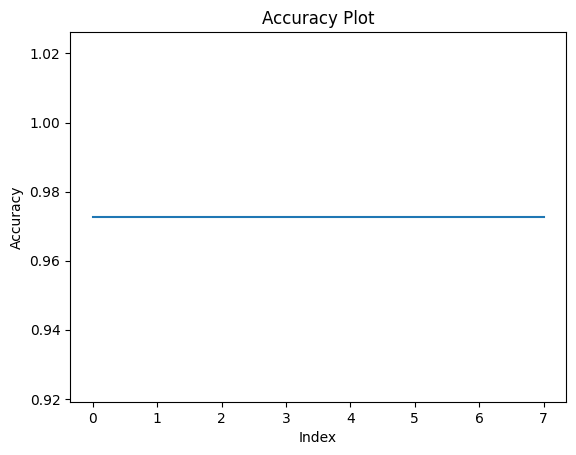

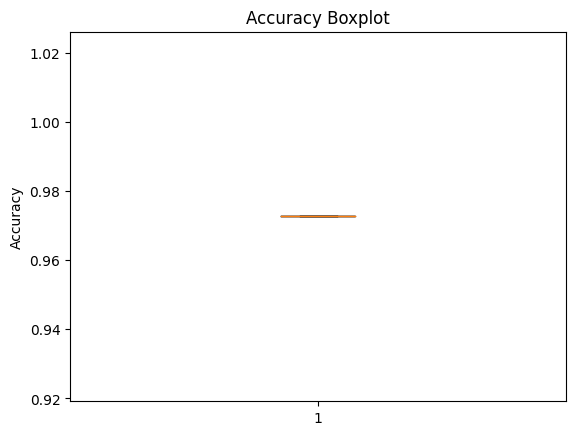

In [39]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have an array named acc

# Plotting the array
plt.plot(acc)
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.show()

# Creating a boxplot of the array
plt.boxplot(acc)
plt.ylabel('Accuracy')
plt.title('Accuracy Boxplot')
plt.show()



In [40]:
max(acc)

0.9726666808128357

In [41]:
#@test {"skip": true}
logdir = "/tmp/logs/scalars/training/"
try:
  tf.io.gfile.rmtree(logdir)  # delete any previous results
except tf.errors.NotFoundError as e:
  pass # Ignore if the directory didn't previously exist.
summary_writer = tf.summary.create_file_writer(logdir)
train_state = iterative_process.initialize()

In [42]:
rm -rf ./logs/


In [43]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


Evaluation process

In [44]:

# Create a model function

# Use this model function to create a training process
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

In [45]:
print(evaluation_process.next.type_signature.formatted_representation())

(<
  state=<
    global_model_weights=<
      trainable=<
        float32[1,128],
        float32[32,128],
        float32[128],
        float32[32,85],
        float32[85],
        float32[85,60],
        float32[60],
        float32[60,25],
        float32[25],
        float32[25,10],
        float32[10],
        float32[10,1],
        float32[1]
      >,
      non_trainable=<>
    >,
    distributor=<>,
    client_work=<
      <>,
      <
        sparse_categorical_accuracy=<
          float32,
          float32
        >,
        true_positives=<
          float32[1]
        >,
        true_negatives=<
          float32[1]
        >,
        false_positives=<
          float32[1]
        >,
        false_negatives=<
          float32[1]
        >,
        loss=<
          float32,
          float32
        >,
        num_examples=<
          int64
        >,
        num_batches=<
          int64
        >
      >
    >,
    aggregator=<
      value_sum_process=<>,
      weight_sum_

In [46]:
evaluation_state = evaluation_process.initialize()
model_weights = iterative_process.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, federated_train_data)

In [ ]:
str(evaluation_output.metrics)

In [ ]:
federated_test_data = make_federated_data(test_data, test_data.client_ids)

len(federated_test_data), federated_test_data[0]

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, federated_test_data)

In [ ]:
str(evaluation_output.metrics)

In [ ]:
str(evaluation_state)

In [ ]:

# Evaluate the model on the evaluation data

# Compute the state confusion matrix
y_true = evaluation_output[0]['y_true']
y_pred = evaluation_output[0]['y_pred']

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(confusion_matrix)

In [ ]:
str(evaluation_output)
